In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
#https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html
# https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average

In [2]:
# Generate data with a cyclical time series and a trend
np.random.seed(0)
trend = 0.5
cycle = np.sin(np.linspace(0, 10*np.pi, 100))
data = trend*np.arange(100) + cycle

# Split data into first 25 periods and remaining periods
train = data[:25]
test = data[25:]

# Estimate model 1 using only trend
model1 = ARIMA(train, order=(1, 1, 0)).fit()
prediction1 = model1.predict(start=25, end=99)

# Estimate model 2 using trend and period
model2 = ARIMA(train, order=(1, 1, 1)).fit()
prediction2 = model2.predict(start=25, end=99, typ='levels')

# Calculate MSE for model 1
mse1 = mean_squared_error(test, prediction1)

# Calculate MSE for model 2
mse2 = mean_squared_error(test, prediction2)

print("Mean Squared Error for Model 1:", mse1)
print("Mean Squared Error for Model 2:", mse2)

Mean Squared Error for Model 1: 9.735736154616434
Mean Squared Error for Model 2: 2.3567120438255835


C:\Users\ericsc\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ericsc\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


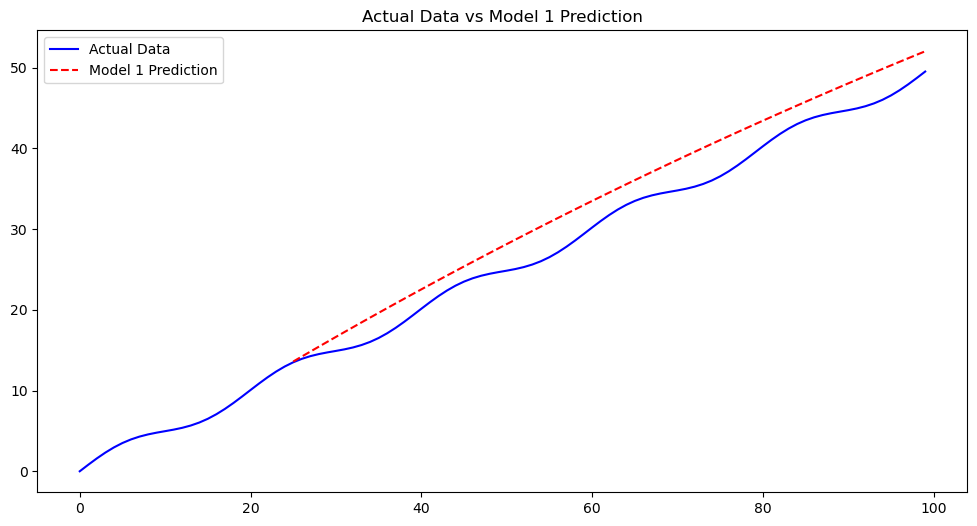

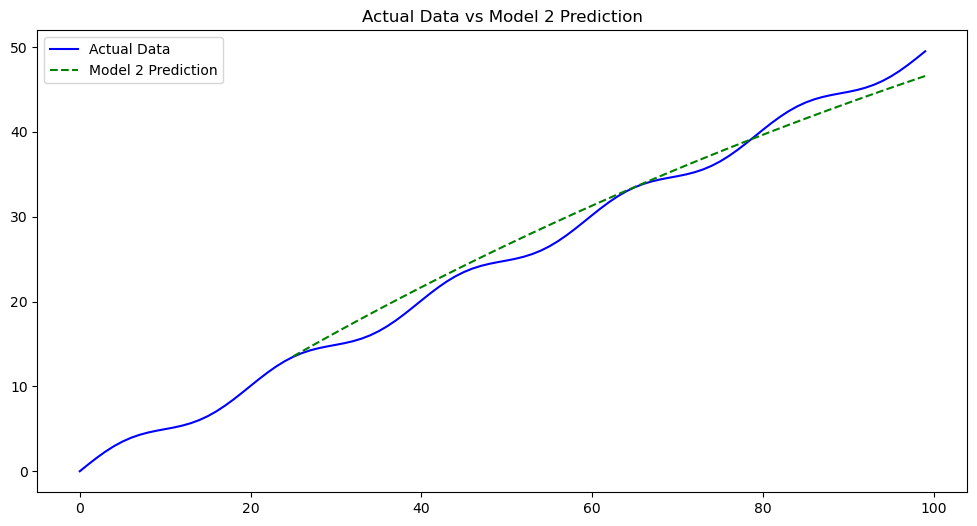

In [3]:

# Plot actual data and predictions for model 1
plt.figure(figsize=(12, 6))
plt.plot(data, color='blue', label='Actual Data')
plt.plot(range(25, 100), prediction1, color='red', linestyle='dashed', label='Model 1 Prediction')
plt.title('Actual Data vs Model 1 Prediction')
plt.legend()
plt.show()

# Plot actual data and predictions for model 2
plt.figure(figsize=(12, 6))
plt.plot(data, color='blue', label='Actual Data')
plt.plot(range(25, 100), prediction2, color='green', linestyle='dashed', label='Model 2 Prediction')
plt.title('Actual Data vs Model 2 Prediction')
plt.legend()
plt.show()